In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


In [2]:
# Importing the Dependencies

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data collection and processing

In [3]:
# loading the dataset to pandas dataframe

df = pd.read_csv('../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
# printing first five rows of the Dataframe

df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# keeping the copy of the Dataset

backup = df.copy()

In [6]:
# Number of rows and columns

df.shape

(614, 13)

In [7]:
# statical Measures

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Numerical columns
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History


In [8]:
# Number of Missing values in each columns

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.shape

(480, 13)

In [12]:
# label encoding

df.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)

In [13]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [14]:
# Dependent column values

df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [15]:
# Replacing the values for 3+ to 4
df.replace(to_replace='3+',value=4, inplace=True)

In [16]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

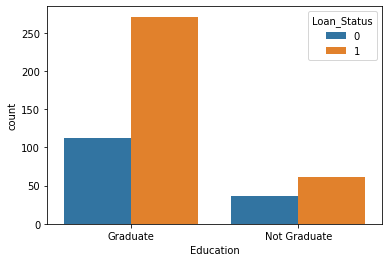

In [17]:
# education and Loan Status

sns.countplot(x='Education',hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

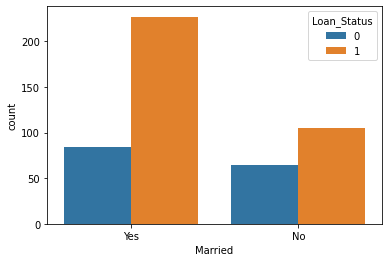

In [18]:
# marital status and Loan status

sns.countplot(x='Married',hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

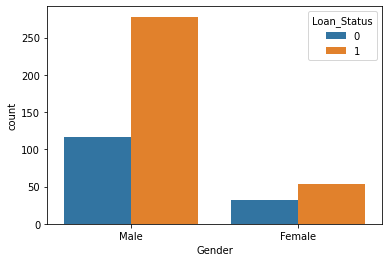

In [19]:
# Gender and Loan Status
sns.countplot(x='Gender',hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

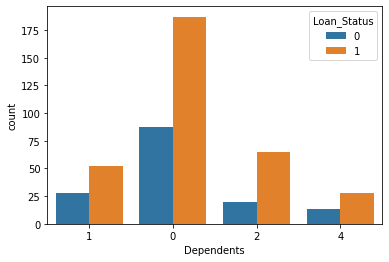

In [20]:
# Dependents and Loan Status

sns.countplot(x='Dependents',hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

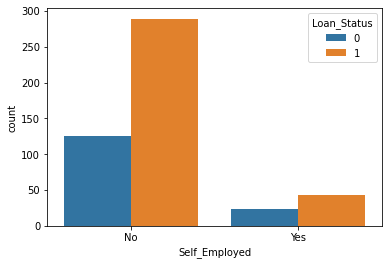

In [21]:
# Self_Employed and Loan Status

sns.countplot(x='Self_Employed',hue='Loan_Status', data=df)

In [22]:
# convert categorical columns to numerical values

df['Married'] = df['Married'].map({'Yes':1,'No':0})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [24]:
# separating the data and label

X = df.drop(columns=['Loan_ID','Loan_Status'])
y = df.Loan_Status

In [25]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [26]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

# Data Standardization

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_scaled = scaler.fit_transform(X)

# Multi-colinearity (VIF)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()

vif['Vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns
vif

,Vif,features
0,1.181486,Gender
1,1.304776,Married
2,1.197062,Dependents
3,1.067544,Education
4,1.035767,Self_Employed
5,1.458116,ApplicantIncome
6,1.135441,CoapplicantIncome
7,1.541506,LoanAmount
8,1.040649,Loan_Amount_Term
9,1.013076,Credit_History


# Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, stratify=y, random_state=2)

# Training the Model:
# Support Vector Machine Model

In [33]:
classifier = svm.SVC(kernel='linear')

In [34]:
# training the support vector machine model
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
# accuracy score on training data

x_train_pred = classifier.predict(X_train)
print('Training Data accuracy: ',accuracy_score(x_train_pred, y_train))

Training Data accuracy:  0.8046875


In [36]:
# accuracy score on test data

x_test_pred = classifier.predict(X_test)
print('Training Data accuracy: ',accuracy_score(x_test_pred, y_test))

Training Data accuracy:  0.8229166666666666


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_reg = LogisticRegression()

In [39]:
# training the model

log_reg.fit(X_train, y_train)

LogisticRegression()

In [40]:
log_y_train_pred = log_reg.predict(X_train)

In [41]:
accuracy_score(log_y_train_pred, y_train)

0.8072916666666666

In [42]:
log_y_test_pred = log_reg.predict(X_test)
accuracy_score(log_y_test_pred, y_test)

0.8229166666666666